Please copy the notebook to your drive and write your code in it.

Import necessary libraries

In [113]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot as plt

Read Dataset from csv file

In [114]:
 iris= pd.read_csv('/content/Iris.csv')

Preview dataset

In [115]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


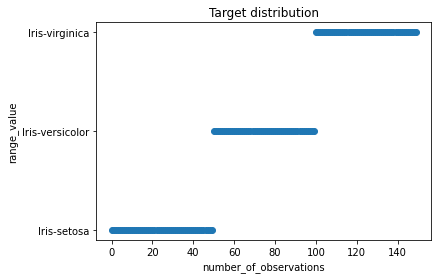

In [116]:
#distribution of target variables
plt.scatter(iris.index , iris['Species'])
plt.xlabel("number_of_observations")
plt.ylabel("range_value")
plt.title("Target distribution")


plt.show()

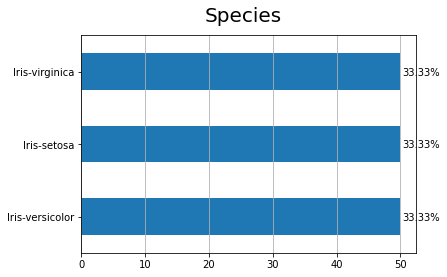

In [117]:
#distribution of each class of target variable
ax = iris[ 'Species'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Species', fontsize=20)
plt.show()

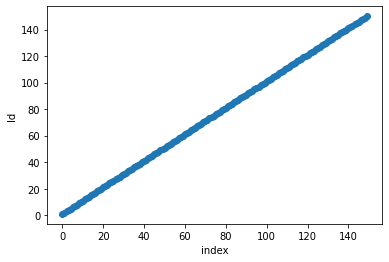

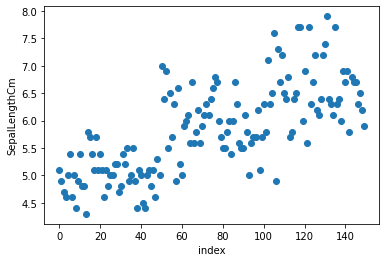

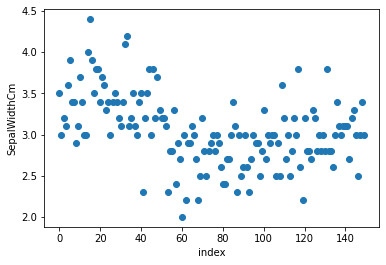

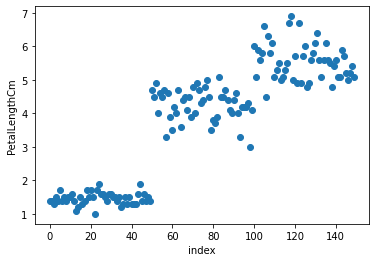

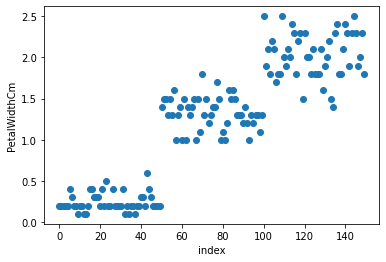

In [118]:
 #Visualize the distribution of data for every feature
for x in iris.columns:
  if x != "Species":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(iris.index,iris[x])
    plt.show()
    print('\n')

Declare feature vector and target variable

In [119]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [120]:
#X = np.array(iris[features])
#y = np.array(iris[["Species"]])

X = (iris[features])
y = (iris[["Species"]])


Replace categorical data with numbers

In [121]:
oe = OrdinalEncoder()
y["Species"] = oe.fit_transform(y[["Species"]])
iris


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Split data into train and test sets

In [122]:
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 31)
#for train_index, test_index in cv.split(X, y):
     #print("TRAIN:", train_index, "TEST:", test_index)
     #X_train, X_test = X[train_index], X[test_index]
     #y_train, y_test = y[train_index], y[test_index]

In [123]:
y

,Species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [124]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)

Fit weak classifier

In [125]:
model.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Calculate the accuracy by the weak learner

In [126]:
score = cross_val_score(model, X, y, scoring='accuracy',cv=5)
score

array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ])

Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [127]:
models_adaB = dict()
estimators = list(range(1,6,1))
for n_est in estimators:
  models_adaB[str(n_est)] = AdaBoostClassifier(base_estimator = model,n_estimators=n_est)
#print(estimators)
#models_adaB

define function to evaluate models



In [128]:
#defining the function to evaluate model
def evaluate_models(model,X,y):
  # define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Plot the model performance

Scores for Model: 1
[0.9        1.         0.93333333 0.96666667 0.9       ]
>1     MEAN IS:0.940    STANDARD DEVIATION IS:(0.039)
 
Scores for Model: 2
[0.96666667 1.         0.9        1.         0.86666667]
>2     MEAN IS:0.947    STANDARD DEVIATION IS:(0.054)
 
Scores for Model: 3
[0.96666667 1.         0.93333333 1.         0.86666667]
>3     MEAN IS:0.953    STANDARD DEVIATION IS:(0.050)
 
Scores for Model: 4
[0.96666667 0.96666667 0.9        0.96666667 0.86666667]
>4     MEAN IS:0.933    STANDARD DEVIATION IS:(0.042)
 
Scores for Model: 5
[0.96666667 1.         0.93333333 0.96666667 0.86666667]
>5     MEAN IS:0.947    STANDARD DEVIATION IS:(0.045)
 


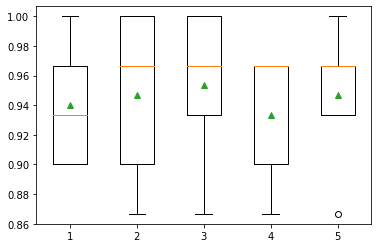

In [129]:
results, names = list(), list()
for name, model in models_adaB.items():
	# evaluate the model
  scores = evaluate_models(model, X, y.values.ravel())
  print("Scores for Model:",name)
  print(scores)
	# store the results
  results.append(scores)
  names.append(name)
	# summarize the performance along the way
  print('>%s     MEAN IS:%.3f    STANDARD DEVIATION IS:(%.3f)' % (name, scores.mean(), scores.std()))
  print(" ")
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

EXTRA ANALYSIS


In [130]:
models_Gra = dict()
estimators1 = list(range(1,6,1))
for n_est in estimators1:
  models_Gra[str(n_est)] = GradientBoostingClassifier(n_estimators=n_est)
models_Gra

{'1': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=1,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 '2': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_

In [131]:
#defining the function to evaluate model
def evaluate_models(model,X,y):
  # define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Scores for Model: 1
[0.93333333 1.         0.93333333 1.         0.9       ]
>1     MEAN IS:0.953    STANDARD DEVIATION IS:(0.040)
 
Scores for Model: 2
[0.93333333 1.         0.93333333 1.         0.9       ]
>2     MEAN IS:0.953    STANDARD DEVIATION IS:(0.040)
 
Scores for Model: 3
[0.96666667 1.         0.93333333 1.         0.9       ]
>3     MEAN IS:0.960    STANDARD DEVIATION IS:(0.039)
 
Scores for Model: 4
[0.93333333 1.         0.93333333 1.         0.9       ]
>4     MEAN IS:0.953    STANDARD DEVIATION IS:(0.040)
 
Scores for Model: 5
[0.96666667 1.         0.93333333 1.         0.9       ]
>5     MEAN IS:0.960    STANDARD DEVIATION IS:(0.039)
 


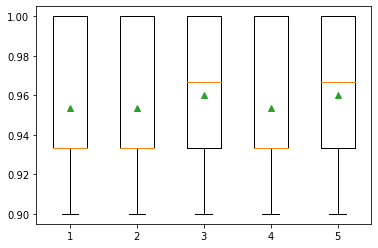

In [132]:
results1, names1 = list(), list()
for name, model in models_Gra.items():
	# evaluate the model
  scores = evaluate_models(model, X, y.values.ravel())
  print("Scores for Model:",name)
  print(scores)
	# store the results
  results1.append(scores)
  names1.append(name)
	# summarize the performance along the way
  print('>%s     MEAN IS:%.3f    STANDARD DEVIATION IS:(%.3f)' % (name, scores.mean(), scores.std()))
  print(" ")
# plot model performance for comparison
plt.boxplot(results1, labels = names1,showmeans=True)
plt.show()
#print(len(results1), "******" ,len(names1))

#Bayes Classfication

Import modules

In [133]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
#from sklearn.model_selection import KFold
#roc auc plot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

Naive Bayes algorithm using 5-fold cross validation 

In [134]:
model_gauss = GaussianNB()
model_gauss.fit(X_train,y_train.values.ravel())
g = cross_val_score(model_gauss, X, y.values.ravel(), cv=5)
g_pred = model_gauss.predict(X_test)
g_score=model_gauss.score(X_test,y_test)
g_score

0.9777777777777777

In [135]:
model_multinom = MultinomialNB()
model_multinom.fit(X_train,y_train.values.ravel())
m = cross_val_score(model_multinom,X,y.values.ravel(),cv=5)
m_pred = model_multinom.predict(X_test)
m_score=model_multinom.score(X_test,y_test)
m_score

0.7111111111111111

In [136]:
model_comp = ComplementNB()
model_comp.fit(X_train,y_train.values.ravel())
c = cross_val_score(model_comp,X,y.values.ravel(),cv=5)
c_pred = model_comp.predict(X_test)
c_score=model_comp.score(X_test,y_test)
c_score

0.6

In [137]:
model_bernom = BernoulliNB()
model_bernom.fit(X_train,y_train.values.ravel())
b = cross_val_score(model_bernom,X,y.values.ravel(),cv=5)
b_pred = model_bernom.predict(X_test)
b_score=model_bernom.score(X_test,y_test)
b_score

0.28888888888888886

Plot the ROC AUC curve

In [138]:
# Binarize the output
#y = label_binarize(y, classes=[0,1,2])
#n_classes = y.shape[1]
#print(n_classes)
n_classes = 3
Y_pred = model_gauss.predict(X_test) 
Y_pred_prob = model_gauss.predict_proba(X_test)

#accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
#acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
#y_test= your_test_y_array  
#fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test,Y_pred)
#NB_fpr,NB_tpr = roc_curve(y_test,Y_pred_prob)

#auc_NB = roc_auc_score(y_test,Y_pred)
#NB_auc = roc_auc_score(y_test,Y_pred_prob)


fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thres[i]  = roc_curve(y_test, Y_pred_prob[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
print("FPR DICTIONARY",fpr)
print("TPR DICTIONARY",tpr)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(actualnew.ravel(), Y_pred.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

FPR DICTIONARY {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0., 0., 0., 1.])}
TPR DICTIONARY {0: array([0.        , 0.76923077, 1.        , 1.        ]), 1: array([0.        , 0.05555556, 1.        , 1.        ]), 2: array([0.        , 0.07142857, 1.        , 1.        ])}


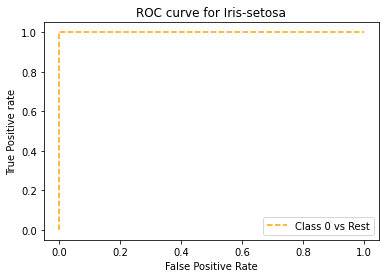

In [139]:
# plotting  
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
#plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('ROC curve for Iris-setosa')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

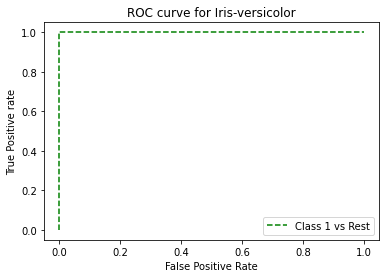

In [140]:
# plotting  
#plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('ROC curve for Iris-versicolor')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

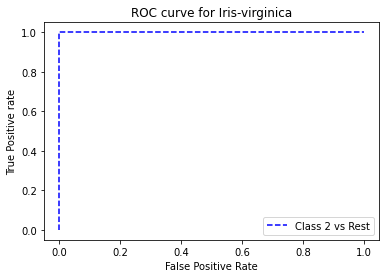

In [141]:
# plotting  
#plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
#plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('ROC curve for Iris-virginica')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [142]:
for i in range(3):
  print("AUC FOR CLASS",i)
  print(roc_auc[i])

AUC FOR CLASS 0
1.0
AUC FOR CLASS 1
1.0
AUC FOR CLASS 2
1.0


In [143]:
from collections import Counter
Counter(y_test)
#y_test

Counter({'Species': 1})

Use logarithmic discriminant function to compute accuracy

In [144]:
X_tr,X_te,Y_tr,Y_te = train_test_split(X,y,test_size = 0.2)
clf_discriminant = LinearDiscriminantAnalysis()
clf_discriminant.fit(X_tr,Y_tr.values.ravel())
print(clf_discriminant.score(X_te,Y_te))

1.0


EXTRA ANALYSIS

In [145]:
clf1_discriminant = QuadraticDiscriminantAnalysis()
clf1_discriminant.fit(X_tr, Y_tr.values.ravel())
print(clf1_discriminant.score(X_te,Y_te))

1.0


Bayes risk

In [146]:
#Risk= sum(lambda*P(c|x); 
gauss_pred1 = model_gauss.predict_proba(X_test)
multi_pred1 = model_multinom.predict_proba(X_test)
comp_pred1= model_comp.predict_proba(X_test)
ber_pred1 = model_bernom.predict_proba(X_test)
model_pred = clf_discriminant.predict_proba(X_te) 
lambda_1 =[]
lambda_2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
for i in [gauss_pred1,multi_pred1,comp_pred1,ber_pred1,model_pred] :
  lambda_1.append(np.sum(np.dot(i,lambda_2.T),axis=0)) #i= pred value
print("Bayes risk for Gaussian is:",lambda_1[0])
print("Bayes risk for Multinomial is:",lambda_1[1])
print("Bayes risk for Complement is:",lambda_1[2])
print("Bayes risk for Bernoulli is:",lambda_1[3])

print("Bayes risk for Linear Discriminant is:",lambda_1[4])

Bayes risk for Gaussian is: [ 91.6650945 226.6650945 361.6650945]
Bayes risk for Multinomial is: [ 96.63302462 231.63302462 366.63302462]
Bayes risk for Complement is: [ 91.21634384 226.21634384 361.21634384]
Bayes risk for Bernoulli is: [ 89.52606193 224.52606193 359.52606193]
Bayes risk for Linear Discriminant is: [ 55.2295553 145.2295553 235.2295553]
